<a href="https://colab.research.google.com/github/rabinkahoonay/test/blob/main/Copy_of_project_capital_markets_29_3_24_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#!pip install yfinance --upgrade --no-cache-dir
#!pip install yahoo_fin
import pandas as pd
import yfinance as yf
import calendar
from datetime import date
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from google.colab import drive
today = datetime.today()

In [6]:
index_list = ['^GSPC', '^TA125.TA', '^DJI', '^IXIC',
              '^VIX','^VVIX','^VIX9D','^VIX3M','^VIX6M',
              '^IRX','^FVX','^TNX','^TYX']
data = yf.download(index_list, start='1980-1-1')['Adj Close']
df= pd.DataFrame([[data]])
df=data.fillna(method='ffill')
df = df.reset_index().round(2)
df = df.rename(columns={  '^GSPC' :'S&P500'    ,'^TA125.TA':'TA_125',
                          '^DJI'  :'Dow_Jones' ,'^IXIC'    :'NASDAQ',
                          '^VIX'  :'VIX'       ,'^VVIX'    :'VIX_Index',
                          '^VIX9D':'VIX9D'     ,'^VIX3M'   :'VIX3M',
                          '^VIX6M':'VIX6M'     ,
                          '^IRX'  :'TB_13W'    ,'^FVX'     :'T5Y',
                          '^TNX'  :'T10Y'      ,'^TYX'     :'T30Y'
                          })

df['Day'] = pd.to_datetime(df['Date']).dt.day
df['Month'] = pd.to_datetime(df['Date']).dt.month
df['Year'] = pd.to_datetime(df['Date']).dt.year
df = df.set_index('Date')
df.tail(5)

[*********************100%%**********************]  13 of 13 completed


Ticker,Dow_Jones,T5Y,S&P500,TB_13W,NASDAQ,TA_125,T10Y,T30Y,VIX,VIX3M,VIX6M,VIX9D,VIX_Index,Day,Month,Year
Date,,,,,,,,,,,,,,,,
2024-03-22,39475.90,4.20,5234.18,5.22,16428.82,2023.79,4.22,4.39,13.06,15.30,17.34,10.86,76.49,22,3,2024
2024-03-25,39313.64,4.23,5218.19,5.22,16384.47,2038.58,4.25,4.43,13.19,15.38,17.46,11.47,76.60,25,3,2024
2024-03-26,39282.33,4.22,5203.58,5.22,16315.70,2043.80,4.23,4.40,13.24,15.29,17.34,11.59,76.77,26,3,2024
2024-03-27,39760.08,4.19,5248.49,5.22,16399.52,2031.75,4.20,4.36,12.78,15.01,17.07,10.53,76.00,27,3,2024
2024-03-28,39807.37,4.22,5254.35,5.20,16379.46,2028.57,4.21,4.35,13.01,15.19,17.19,10.56,76.57,28,3,2024


In [7]:
def add_daily_change(df):
  # Identify time series columns (assuming numeric datatypes for simplicity)
  numeric_cols = [col for col in df.columns if pd.api.types.is_numeric_dtype(df[col])]
  timeseries_cols = [col for col in numeric_cols if len(df) > 1]  # Ensure there are at least 2 rows

  # Create new columns with daily changes (shift by -1 for difference)
  for col in timeseries_cols:
    df[col + "_p"] = df[col].diff(periods=1).round(2)
    df[col + "_c1"]= (df[col].pct_change(1)*100).round(2)
    df[col + "_c2"]= (df[col].pct_change(2)*100).round(2)
    df[col + "_c3"]= (df[col].pct_change(3)*100).round(2)
  return df



df = add_daily_change(df.copy())  # Operate on a copy to avoid modifying the original
df=df.round(2)
#print("Daily Data of the indices \n   " , df.tail(5))
df.tail(10).T

Date,2024-03-17,2024-03-18,2024-03-19,2024-03-20,2024-03-21,2024-03-22,2024-03-25,2024-03-26,2024-03-27,2024-03-28
Ticker,,,,,,,,,,
Dow_Jones,38714.77,38790.43,39110.76,39512.13,39781.37,39475.90,39313.64,39282.33,39760.08,39807.37
T5Y,4.32,4.36,4.30,4.24,4.25,4.20,4.23,4.22,4.19,4.22
S&P500,5117.09,5149.42,5178.51,5224.62,5241.53,5234.18,5218.19,5203.58,5248.49,5254.35
TB_13W,5.24,5.24,5.24,5.23,5.23,5.22,5.22,5.22,5.22,5.20
NASDAQ,15973.17,16103.45,16166.79,16369.41,16401.84,16428.82,16384.47,16315.70,16399.52,16379.46
...,...,...,...,...,...,...,...,...,...,...
Month_c3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Year_p,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Year_c1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [9]:
# חישוב ממוצע נע עבור עמדות ספציפיות
New_Names=['S&P500','TA_125','Dow_Jones','NASDAQ','VIX','VIX_Index','VIX9D','VIX3M','VIX6M','TB_13W','T5Y','T10Y','T30Y']
window_size = 30
for col in New_Names:
    df[col + "_MA30"] = df[col].rolling(window_size).mean().round(2)
    df[col + "/_MA30"] = (df[col]/df[col + "_MA30"]).round(4)
df.tail(5).T

Date,2024-03-22,2024-03-25,2024-03-26,2024-03-27,2024-03-28
Ticker,,,,,
Dow_Jones,39475.9000,39313.6400,39282.3300,39760.0800,39807.3700
T5Y,4.2000,4.2300,4.2200,4.1900,4.2200
S&P500,5234.1800,5218.1900,5203.5800,5248.4900,5254.3500
TB_13W,5.2200,5.2200,5.2200,5.2200,5.2000
NASDAQ,16428.8200,16384.4700,16315.7000,16399.5200,16379.4600
...,...,...,...,...,...
T5Y/_MA30,0.9929,1.0000,0.9976,0.9929,1.0000
T10Y_MA30,4.2300,4.2300,4.2300,4.2300,4.2200
T10Y/_MA30,0.9976,1.0047,1.0000,0.9929,0.9976


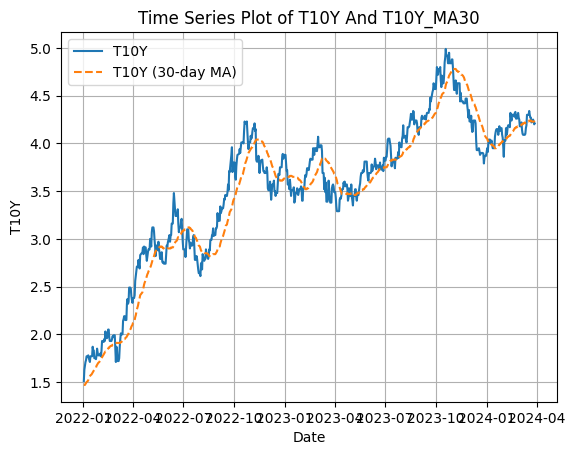

In [10]:
import matplotlib.pyplot as plt
dates = pd.date_range("2022-01-01", pd.to_datetime("today"))
df1 = df.loc[df.index.isin(dates)]
plt.xlabel('Date')
plt.ylabel('T10Y')
plt.plot(df1.index, df1["T10Y"], linestyle="-", label="T10Y")
plt.plot(df1.index, df1["T10Y_MA30"], linestyle="--", label="T10Y (30-day MA)")
plt.legend()
plt.title('Time Series Plot of T10Y And T10Y_MA30')
plt.grid(True)